# Citation

Much of the code and examples are copied/modified from 

> Blueprints for Text Analytics Using Python by Jens Albrecht, Sidharth Ramachandran, and Christian Winkler (O'Reilly, 2021), 978-1-492-07408-3.
>

- https://github.com/blueprints-for-text-analytics-python/blueprints-text
- https://github.com/blueprints-for-text-analytics-python/blueprints-text/blob/master/ch01/First_Insights.ipynb

---

# Setup

In [1]:
%run "../config/notebook_settings.py"

from helpers.utilities import Timer, get_logger
from helpers.text_processing import count_tokens

def get_project_directory():
    return os.getcwd().replace('/source/executables', '')

print(get_project_directory())

/Users/shanekercheval/repos/nlp-template


In [2]:
with Timer("Loading Data"):
    path = os.path.join(get_project_directory(), 'artifacts/data/processed/un-general-debates-blueprint.pkl')
    df = pd.read_pickle(path)

Started: Loading Data
Finished (0.95 seconds)


---

# Exploratory Data Analysis

This section provides a basic exploration of the text and dataset.

## Dataset Summary

In [34]:
hlp.pandas.numeric_summary(df)

,# of Non-Nulls,# of Nulls,% Nulls,# of Zeros,% Zeros,Mean,St Dev.,Coef of Var,Skewness,Kurtosis,Min,10%,25%,50%,75%,90%,Max
session,"7,507",0,0.0%,0,0.0%,49.6,12.9,0.3,-0.2,-1.1,25,31.0,39.0,51.0,61.0,67.0,70
year,"7,507",0,0.0%,0,0.0%,"1,994.6",12.9,0.0,-0.2,-1.1,"1,970","1,976.0","1,984.0","1,996.0","2,006.0","2,012.0","2,015"
num_tokens,"7,507",0,0.0%,0,0.0%,"1,480.3",635.2,0.4,1.1,1.7,187,793.6,"1,005.5","1,358.0","1,848.0","2,336.4","5,688"
text_length,"7,507",0,0.0%,0,0.0%,"17,967.3","7,860.0",0.4,1.1,1.8,"2,362","9,553.8","12,077.0","16,424.0","22,479.5","28,658.2","72,041"


In [35]:
hlp.pandas.non_numeric_summary(df)

,# of Non-Nulls,# of Nulls,% Nulls,Most Freq. Value,# of Unique,% Unique
country,"7,507",0,0.0%,ALB,199,2.7%
country_name,"7,507",0,0.0%,Albania,199,2.7%
speaker,"7,507",0,0.0%,<unknown>,"5,429",72.3%
position,"7,507",0,0.0%,<unknown>,114,1.5%
text,"7,507",0,0.0%,33: May I first convey to our [...],"7,507",100.0%
tokens,"7,507",0,0.0%,"['may', 'first', 'convey', 'pr[...]","7,507",100.0%


---

## Explore Non-Text Columns

Explore idiosyncrasies of various columns, e.g. same speaker represented multiple ways.

In [36]:
df[df['speaker'].str.contains('Bush')]['speaker'].value_counts()

George W. Bush        4
Mr. George W. Bush    2
Bush                  1
George Bush           1
Mr. George W Bush     1
Name: speaker, dtype: int64

---

## Explore Text Column|

### Top Words Used

In [39]:
count_tokens(df['tokens']).head(20)

,frequency
token,
nations,124508
united,120763
international,117223
world,89421
countries,85734
peace,72625
development,62632
states,59713
people,59338


---

### Distribution of Text Length

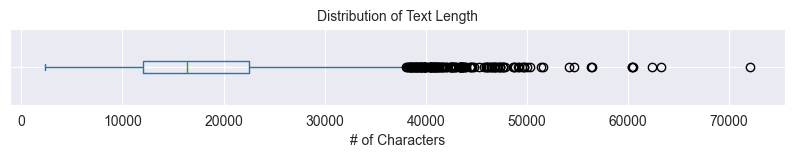

In [40]:
ax = df['text_length'].plot(kind='box', vert=False, figsize=(10, 1))
ax.set_title("Distribution of Text Length")
ax.set_xlabel("# of Characters")
ax.set_yticklabels([])
ax;

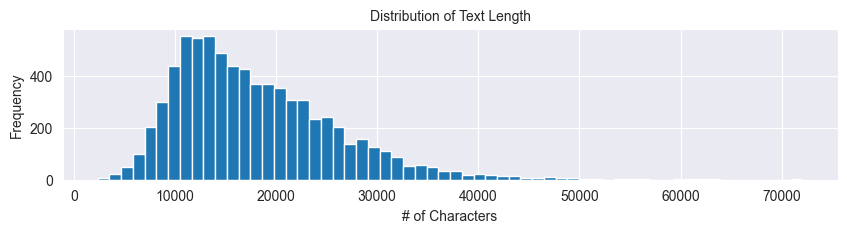

In [41]:
ax = df['text_length'].plot(kind='hist', bins=60, figsize=(10, 2));
ax.set_title("Distribution of Text Length")
ax.set_xlabel("# of Characters")
ax;

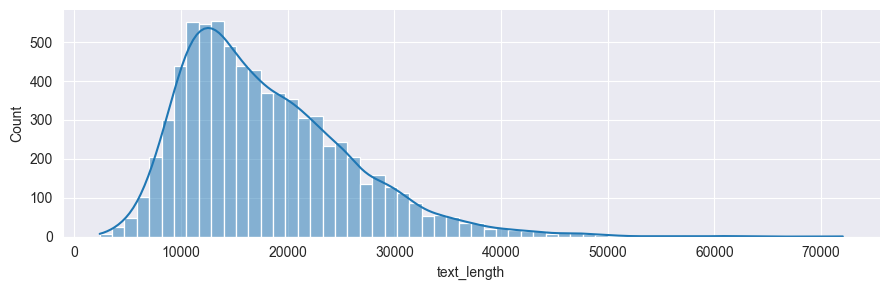

In [42]:
import seaborn as sns
sns.displot(df['text_length'], bins=60, kde=True, height=3, aspect=3);

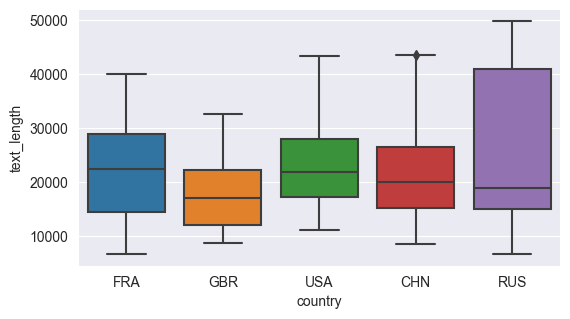

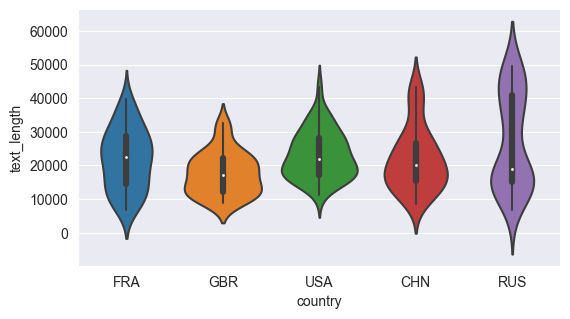

In [46]:
where = df['country'].isin(['USA', 'FRA', 'GBR', 'CHN', 'RUS'])
g = sns.catplot(data=df[where], x="country", y="text_length", kind='box')
g.fig.set_size_inches(6, 3)
g.fig.set_dpi(100)
g = sns.catplot(data=df[where], x="country", y="text_length", kind='violin')
g.fig.set_size_inches(6, 3)
g.fig.set_dpi(100)

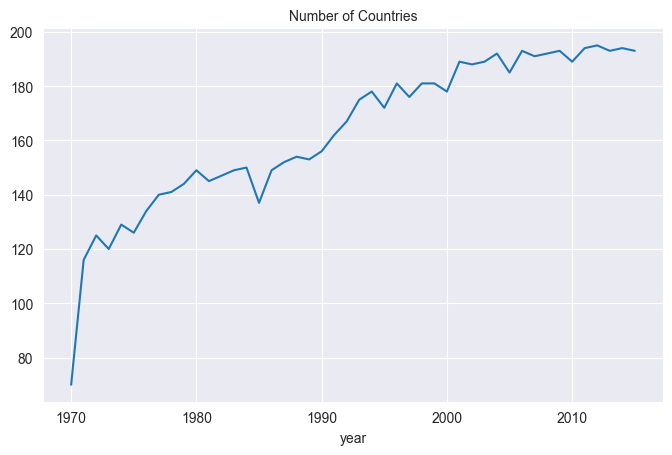

In [32]:
assert not df[['year', 'country']].duplicated().any()
df.groupby('year').size().plot(title="Number of Countries");

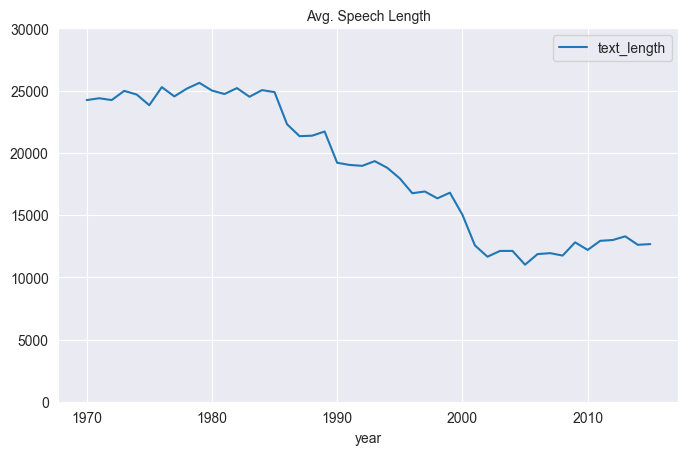

In [33]:
df.groupby('year').agg({'text_length': 'mean'}) \
  .plot(title="Avg. Speech Length", ylim=(0,30000));

In [50]:
counts_df = count_tokens(df['tokens'])

In [52]:
counts_df

,frequency
token,
nations,124508
united,120763
international,117223
world,89421
countries,85734
...,...
zealousness,2
cancels,2
quasi-unanimous,2


In [53]:
counts_df.to_dict()['frequency']

{'nations': 124508,
 'united': 120763,
 'international': 117223,
 'world': 89421,
 'countries': 85734,
 'peace': 72625,
 'development': 62632,
 'states': 59713,
 'people': 59338,
 'security': 58425,
 'economic': 53833,
 'must': 51880,
 'also': 47403,
 'new': 44453,
 'country': 40878,
 'assembly': 40413,
 'community': 38294,
 'government': 37430,
 'general': 37138,
 'organization': 36434,
 'human': 36384,
 'would': 35936,
 'efforts': 35184,
 'us': 34618,
 'rights': 33495,
 'political': 33353,
 'one': 31840,
 'africa': 31293,
 'support': 30224,
 'council': 29573,
 'session': 29391,
 'developing': 25977,
 'peoples': 25161,
 'time': 24870,
 'order': 23581,
 'republic': 23369,
 'national': 23221,
 'problems': 23176,
 'many': 22849,
 'year': 22702,
 'situation': 22621,
 'state': 22579,
 'years': 22400,
 'south': 22246,
 'global': 21881,
 'conference': 21719,
 'region': 21470,
 'social': 21133,
 'like': 20566,
 'work': 20495,
 'made': 20328,
 'war': 20070,
 'great': 19505,
 'process': 19493,


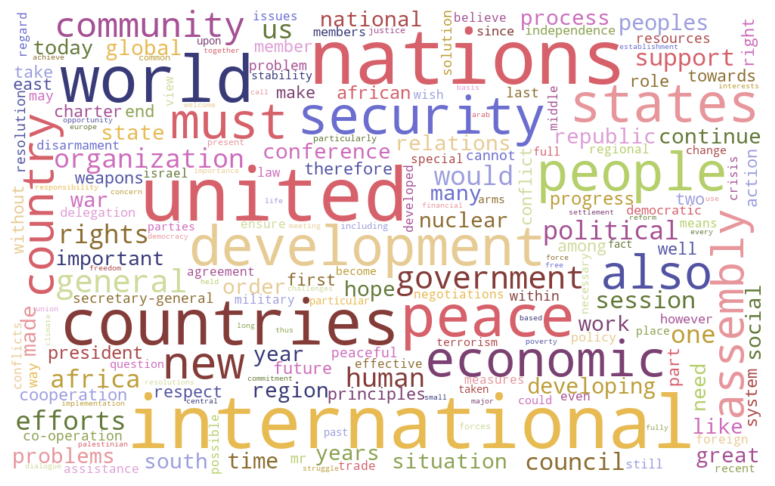

In [86]:
wc = wordcloud.WordCloud(background_color='white',
    #colormap='RdYlGn',
    colormap='tab20b',
    width=round(hlp.plot.STANDARD_WIDTH*100),
    height=round(hlp.plot.STANDARD_HEIGHT*100),
    max_words = 200, max_font_size=100,
    random_state=42
)
wc.generate_from_frequencies(counts_df.to_dict()['frequency'])

fig, ax = plt.subplots(figsize=(hlp.plot.STANDARD_WIDTH, hlp.plot.STANDARD_HEIGHT))
ax.imshow(wc, interpolation='bilinear')
#plt.title("XXX")
plt.axis('off');